In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sns
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/Users/hwang-gyuhan/Desktop/Collage/3-2/딥러닝응용/1주차/abalone.csv", index_col=None)
df["Sex"] = df["Sex"].map({"F": 0, "M": 1, "I": 2})
df


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Check NaN

In [2]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

### Count label (graph)

Text(0.5, 1.0, 'Rings')

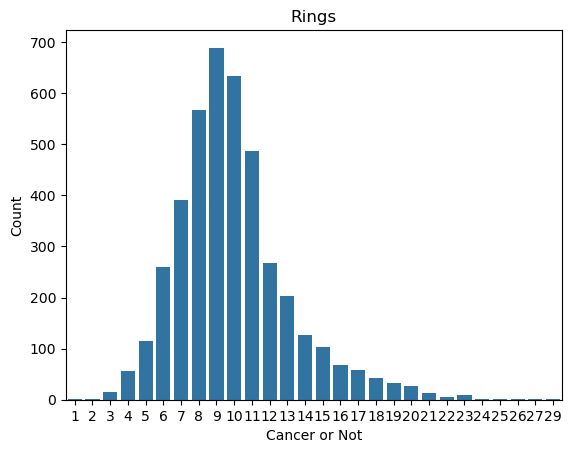

In [3]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Rings")

### Count label (number)

In [4]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

### Check Histograms by Column

/var/folders/jy/y6254wqj0mb56d0c2yp5dtwc0000gn/T/ipykernel_74087/37914476.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
/var/folders/jy/y6254wqj0mb56d0c2yp5dtwc0000gn/T/ipykernel_74087/37914476.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

<Axes: xlabel='Diameter', ylabel='Density'>

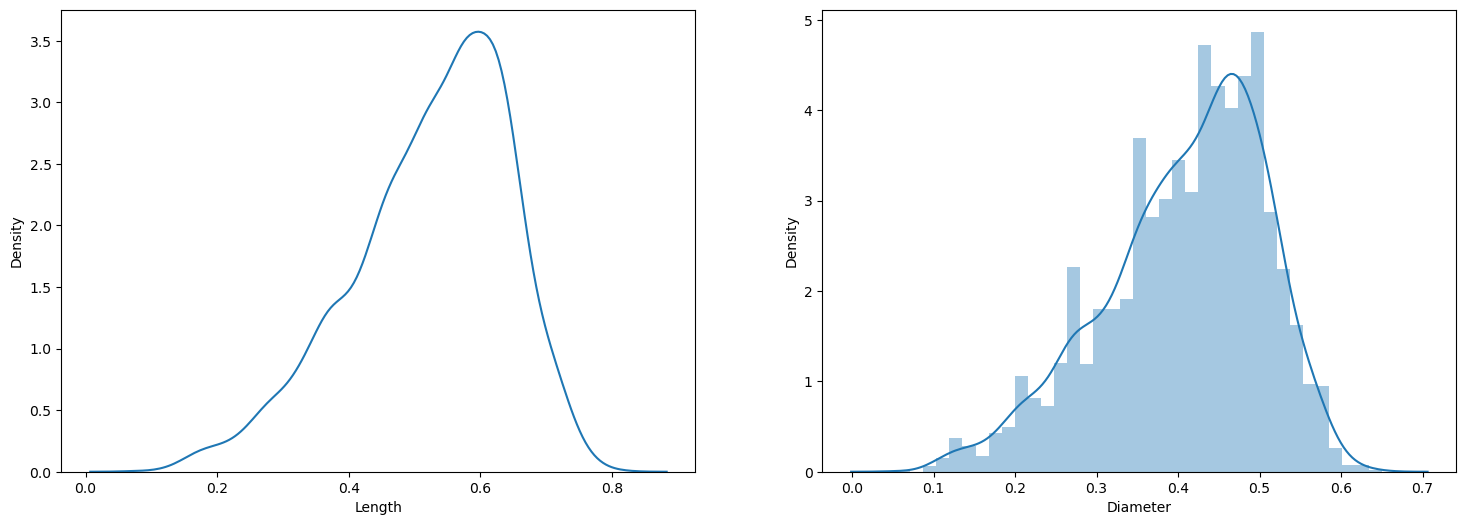

In [5]:
# 여기서는 Length와 Diameter 선택

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Diameter'], ax=ax2)

### Check the scatterplot

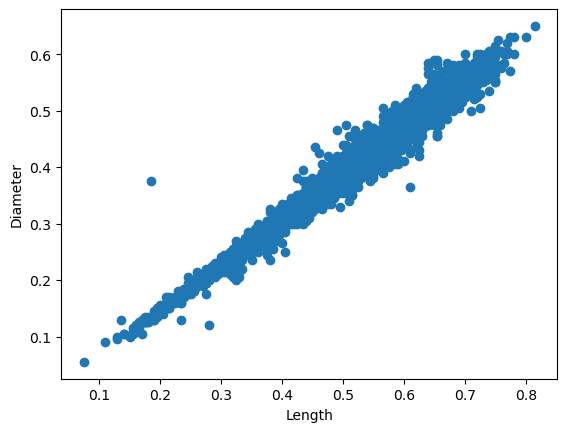

In [6]:
plt.scatter(df['Length'], df['Diameter'])
plt.xlabel('Length')
plt.ylabel('Diameter')

plt.show()

### Examine each correlation

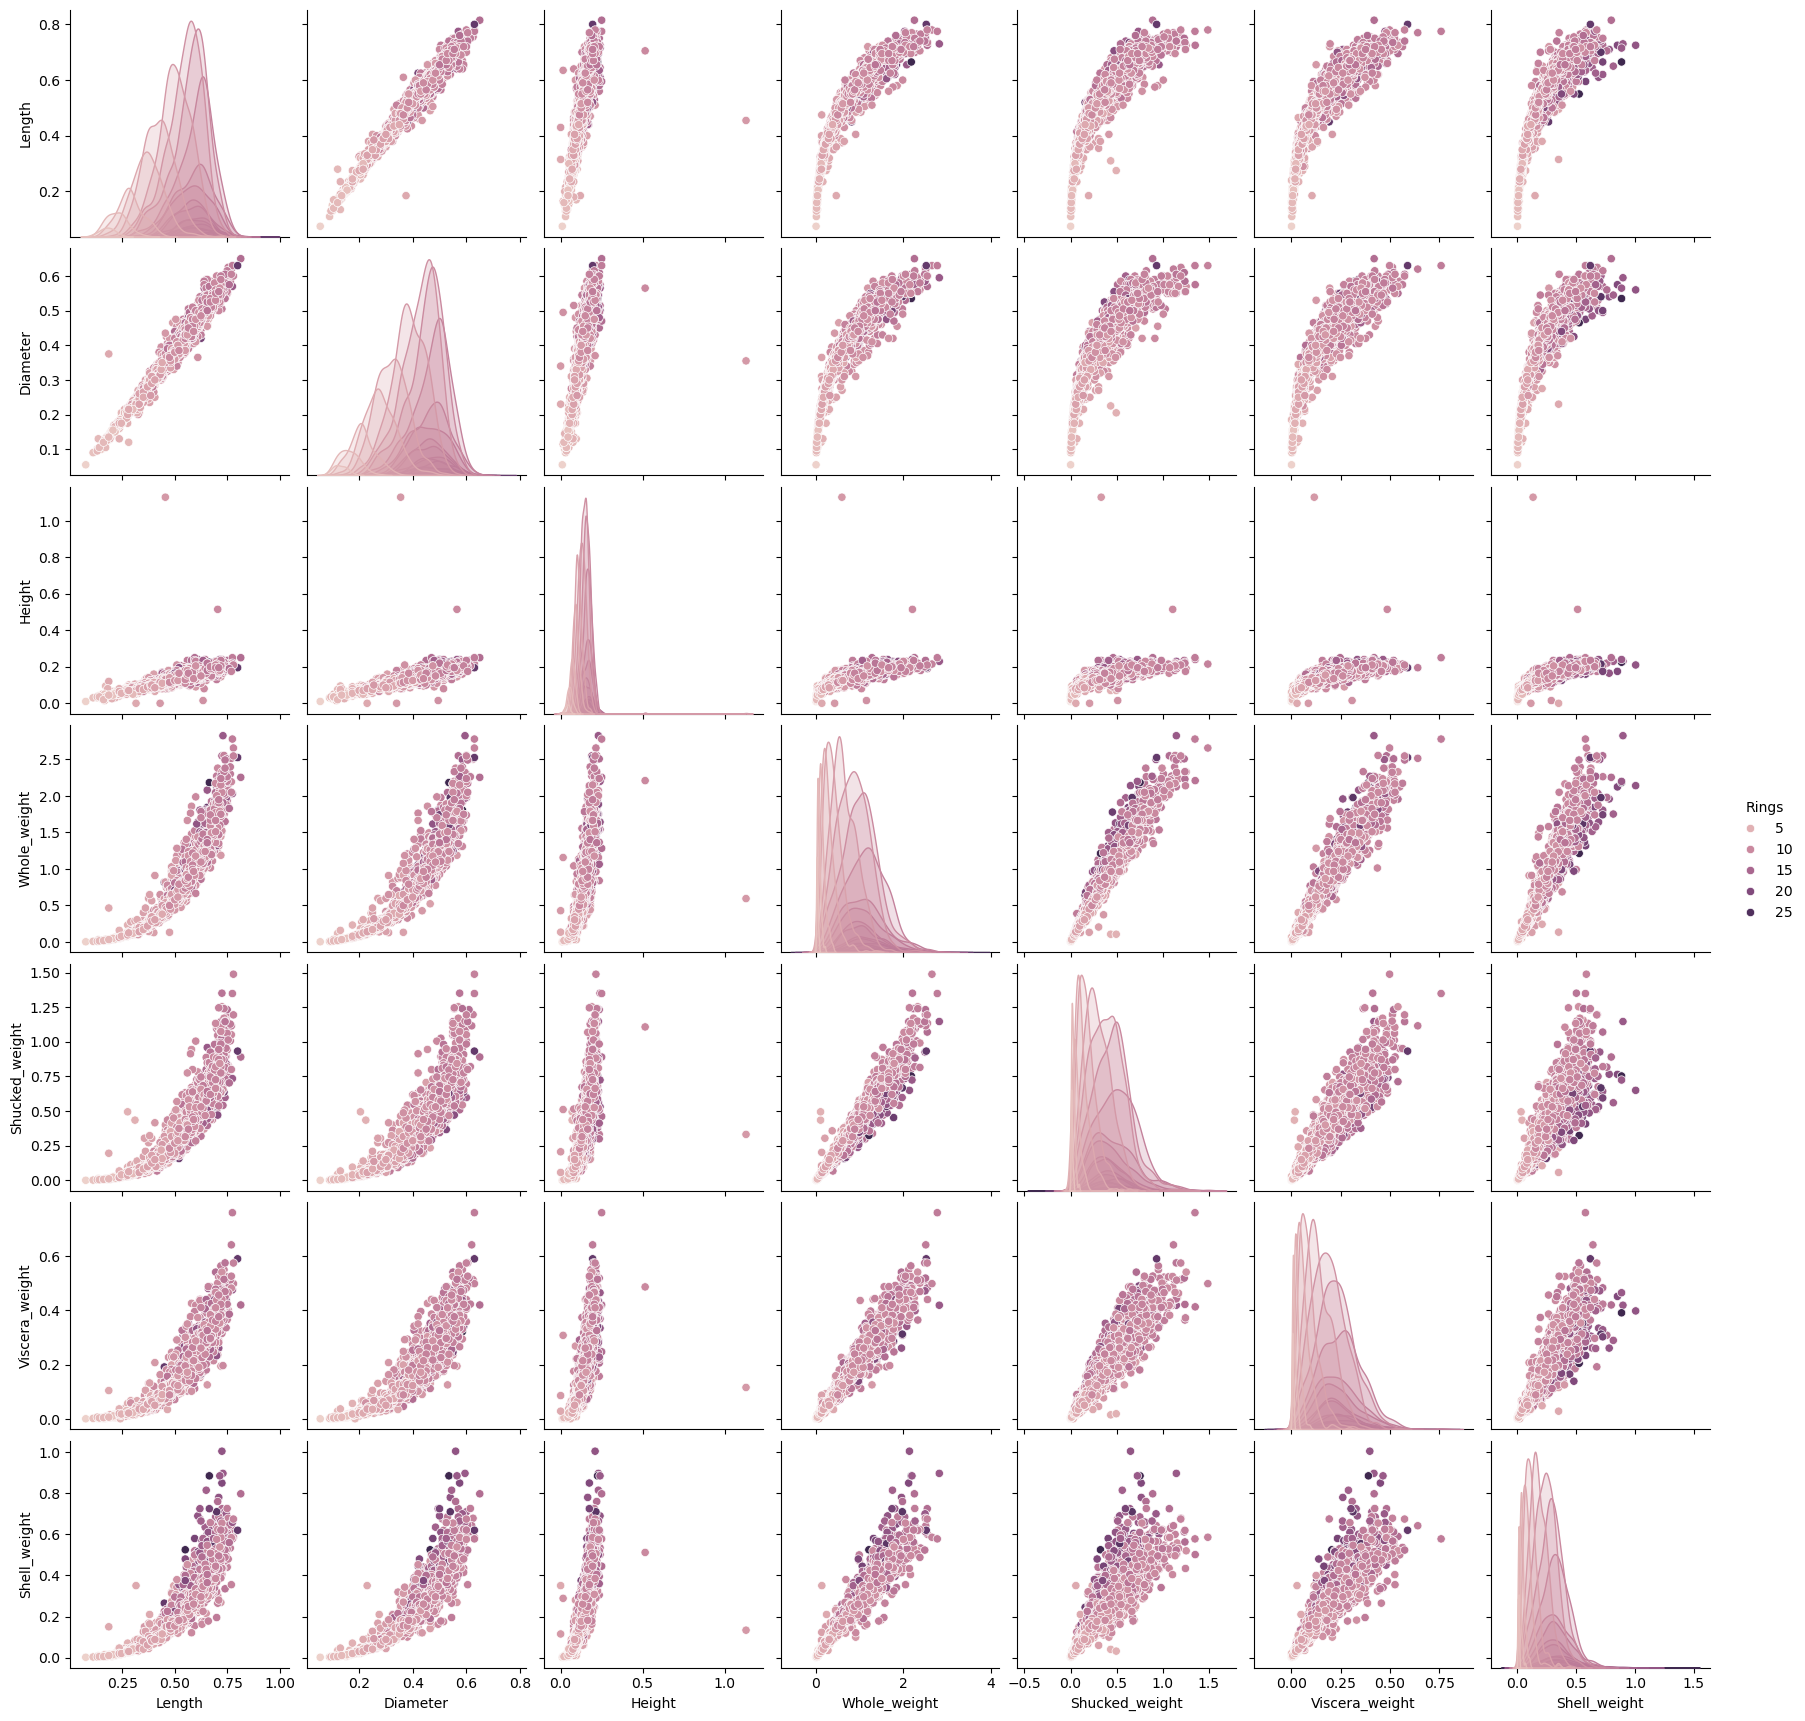

In [7]:
sns.pairplot(df,
             vars=['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight'],
            hue ='Rings')
plt.show()

### Verifying the scope and outlier of a particular column


/var/folders/jy/y6254wqj0mb56d0c2yp5dtwc0000gn/T/ipykernel_74087/140688713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Length", data=df, palette="Set3")


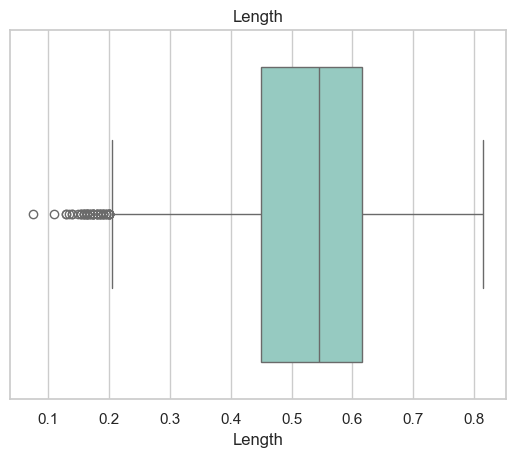

In [8]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="Length", data=df, palette="Set3")
plt.title("Length")
plt.show()

### Check Histograms for Each Column

/var/folders/jy/y6254wqj0mb56d0c2yp5dtwc0000gn/T/ipykernel_74087/111277950.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


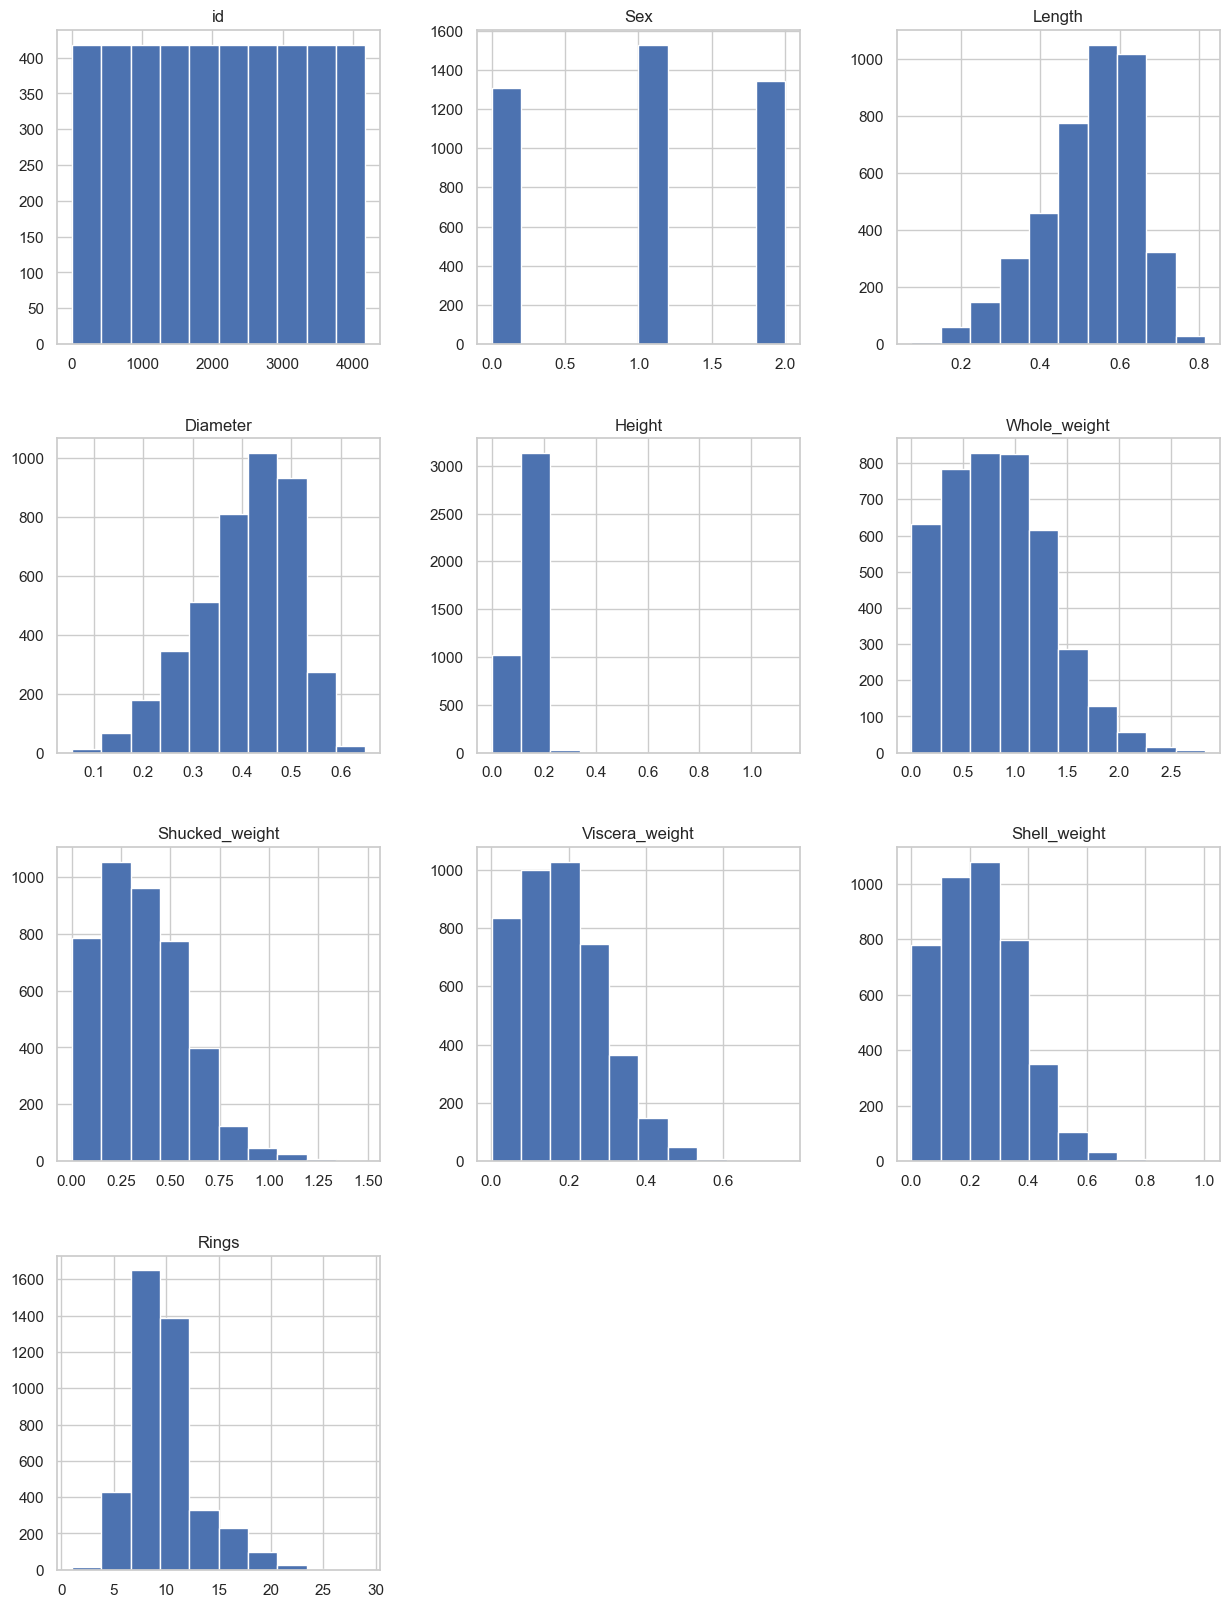

In [9]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [61]:
# 1열부터 8열까지가 입력 데이터 X
X = df.iloc[:, :9]

# 9열이 레이블 y 
y = df.iloc[:, 9]


In [56]:
X

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [57]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

### Defining the Model

In [4]:
# X는 10열(Rings)을 입력으로, y는 2열(성별)을 타겟으로 설정
X_train = df['Rings'].values.reshape(-1, 1)  # 10열을 입력으로 사용
y_train = df['Sex'].values  # 2열(성별)

# 모델 구성
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))  # 입력은 Rings 값 하나
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 성별 분류 (F, M, I)

# 모델 컴파일
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # 성별이 one-hot 인코딩 되어 있으면 categorical_crossentropy
              metrics=['accuracy'])

# 모델 학습
model_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

loss, acc = model.evaluate(X_train, y_train, verbose=0)

# 최종 정확도 출력
print(f"Test Accuracy: {acc * 100:.2f}%")


Epoch 1/30
105/105 [==============================] - 0s 2ms/step - loss: 1.0820 - accuracy: 0.3568 - val_loss: 1.0794 - val_accuracy: 0.3529
Epoch 2/30
105/105 [==============================] - 0s 895us/step - loss: 1.0617 - accuracy: 0.3610 - val_loss: 1.0616 - val_accuracy: 0.3852
Epoch 3/30
105/105 [==============================] - 0s 823us/step - loss: 1.0465 - accuracy: 0.4056 - val_loss: 1.0686 - val_accuracy: 0.4486
Epoch 4/30
105/105 [==============================] - 0s 845us/step - loss: 1.0309 - accuracy: 0.4529 - val_loss: 1.0337 - val_accuracy: 0.4450
Epoch 5/30
105/105 [==============================] - 0s 786us/step - loss: 1.0135 - accuracy: 0.4723 - val_loss: 1.0333 - val_accuracy: 0.4438
Epoch 6/30
105/105 [==============================] - 0s 861us/step - loss: 1.0040 - accuracy: 0.4942 - val_loss: 1.0627 - val_accuracy: 0.4330
Epoch 7/30
105/105 [==============================] - 0s 781us/step - loss: 0.9955 - accuracy: 0.4894 - val_loss: 0.9871 - val_accuracy: 0